## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM  
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn import model_selection

### Split Function

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit,ShuffleSplit
def train_val_test_split(X,Y,val_pct,test_pct,random_state=None,stratify=False):
    val_pct=val_pct/(1-test_pct)
    
    if stratify:
        split_function = StratifiedShuffleSplit
    else:
        split_function = ShuffleSplit

    split_test = split_function(n_splits=1,test_size=test_pct, random_state=random_state)
    for train_index, test_index in split_test.split(X,Y):
        X_train_full = X[train_index,:]
        X_test = X[test_index,:]
        Y_train_full = Y[train_index]
        Y_test = Y[test_index]

    split_validation = split_function(n_splits=1,test_size=val_pct, random_state=random_state)
    for train_index, validation_index in split_validation.split(X_train_full, Y_train_full):
        X_train = X_train_full[train_index,:]
        X_validation = X_train_full[validation_index,:]
        Y_train = Y_train_full[train_index]
        Y_validation = Y_train_full[validation_index]
    
    return X_train,Y_train,X_validation,Y_validation,X_test,Y_test

## MLP Regression in Keras

We will compare the polynomial regression from the linear regression demonstration with a model created using Keras.

In [3]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

The code below generates 1000 points from a quadratic polynomial with some noise added.

In [4]:
m = 1000

X = 6 * np.random.rand(m, 1) - 3

y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


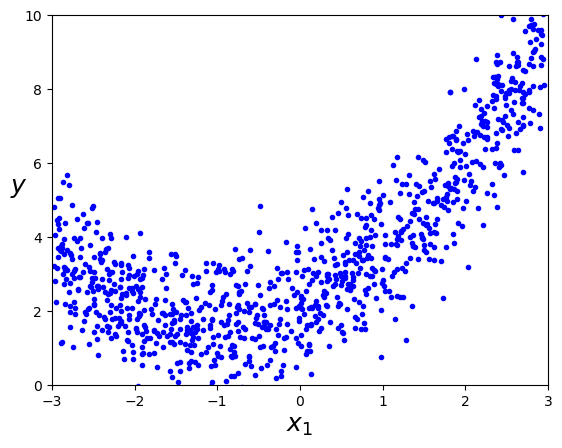

In [5]:
%matplotlib inline
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

### Split Dataset

We will split the dataset into training, validaition, and test sets

In [6]:
X_train,Y_train,X_validation,Y_validation,X_test,Y_test = train_val_test_split(X,y,val_pct=.2,test_pct=.2)

### Construct Polynomial Model

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
poly_linreg =  LinearRegression()
poly_linreg.fit(X_poly, Y_train)
X_validation_poly = poly_features.transform(X_validation)
Y_poly_val = poly_linreg.predict(X_validation_poly)
print("Polynomial Regression MSE:",mean_squared_error(Y_validation,Y_poly_val))

Polynomial Regression MSE: 0.9176095279108796


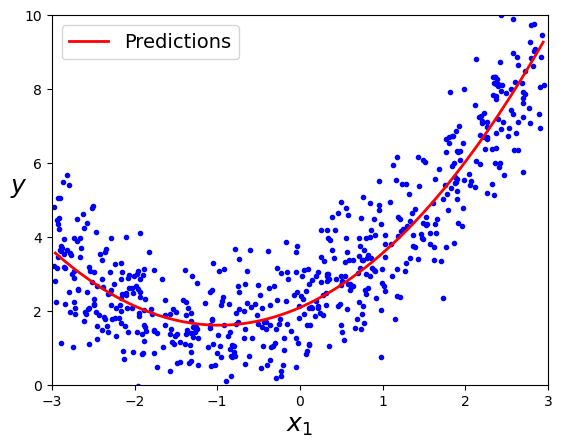

In [8]:
plt.plot(X_train, Y_train, "b.")
ix = np.argsort(X_validation[:,0])
plt.plot(X_validation[ix], Y_poly_val[ix], "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

# Construct MLP Regressor in Keras

In Keras, the `Sequential` model can be used to construct models that require only single inputs and output *per layer*. The inputs/outputs can be vectors or matrices, but they cannot be more than one. The Keras *functional API* enables more complicated models to be produced. 

In [9]:
model = Sequential([
    keras.Input(shape=(1,)),
    Dense(50,activation='relu'),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [10]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
model.compile(loss="mse", optimizer="adam")
history=model.fit(X_train, Y_train, epochs=300,
                    validation_data=(X_validation, Y_validation))

Epoch 1/300
19/19 [==============================] - 1s 10ms/step - loss: 13.1518 - val_loss: 12.5205
Epoch 2/300
19/19 [==============================] - 0s 2ms/step - loss: 10.9308 - val_loss: 10.3804
Epoch 3/300
19/19 [==============================] - 0s 2ms/step - loss: 8.9947 - val_loss: 8.5082
Epoch 4/300
19/19 [==============================] - 0s 2ms/step - loss: 7.3273 - val_loss: 6.8474
Epoch 5/300
19/19 [==============================] - 0s 2ms/step - loss: 5.8555 - val_loss: 5.4285
Epoch 6/300
19/19 [==============================] - 0s 2ms/step - loss: 4.6026 - val_loss: 4.2286
Epoch 7/300
19/19 [==============================] - 0s 2ms/step - loss: 3.5474 - val_loss: 3.2561
Epoch 8/300
19/19 [==============================] - 0s 2ms/step - loss: 2.7264 - val_loss: 2.4602
Epoch 9/300
19/19 [==============================] - 0s 2ms/step - loss: 2.0956 - val_loss: 1.8778
Epoch 10/300
19/19 [==============================] - 0s 2ms/step - loss: 1.6456 - val_loss: 1.4899
Epoc

Epoch 83/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0599 - val_loss: 0.9760
Epoch 84/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0580 - val_loss: 0.9788
Epoch 85/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0591 - val_loss: 0.9768
Epoch 86/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0588 - val_loss: 0.9802
Epoch 87/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0570 - val_loss: 0.9799
Epoch 88/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0577 - val_loss: 0.9760
Epoch 89/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0581 - val_loss: 0.9778
Epoch 90/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0565 - val_loss: 0.9755
Epoch 91/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0579 - val_loss: 0.9756
Epoch 92/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0571 - val_loss: 0.9802


19/19 [==============================] - 0s 2ms/step - loss: 1.0365 - val_loss: 0.9687
Epoch 165/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0341 - val_loss: 0.9626
Epoch 166/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0367 - val_loss: 0.9603
Epoch 167/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0346 - val_loss: 0.9646
Epoch 168/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0366 - val_loss: 0.9578
Epoch 169/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0316 - val_loss: 0.9632
Epoch 170/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0345 - val_loss: 0.9620
Epoch 171/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0352 - val_loss: 0.9621
Epoch 172/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0321 - val_loss: 0.9601
Epoch 173/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0319 - val_loss: 0.9582
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 1.0154 - val_loss: 0.9414
Epoch 246/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0085 - val_loss: 0.9367
Epoch 247/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0072 - val_loss: 0.9380
Epoch 248/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0071 - val_loss: 0.9377
Epoch 249/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0094 - val_loss: 0.9427
Epoch 250/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0094 - val_loss: 0.9342
Epoch 251/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0051 - val_loss: 0.9405
Epoch 252/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0052 - val_loss: 0.9369
Epoch 253/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0075 - val_loss: 0.9368
Epoch 254/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0079 - val_loss: 0.9395
Epoc

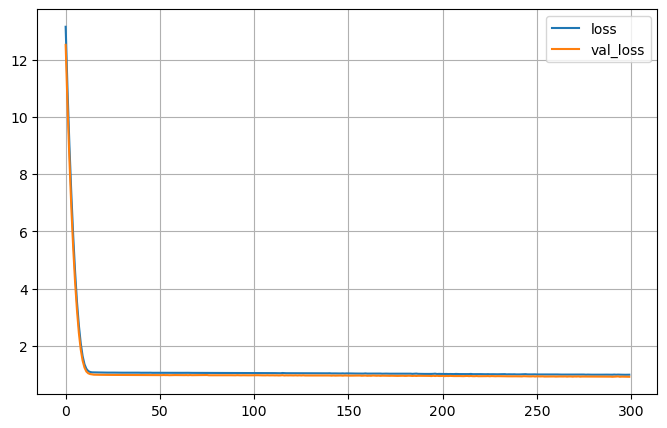

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
mlp_pred = model.predict(X_validation)
mlp_valid_mse = model.evaluate(X_validation,Y_validation)
print(mlp_valid_mse)

7/7 [==============================] - 0s 834us/step - loss: 0.9249
0.9249464273452759


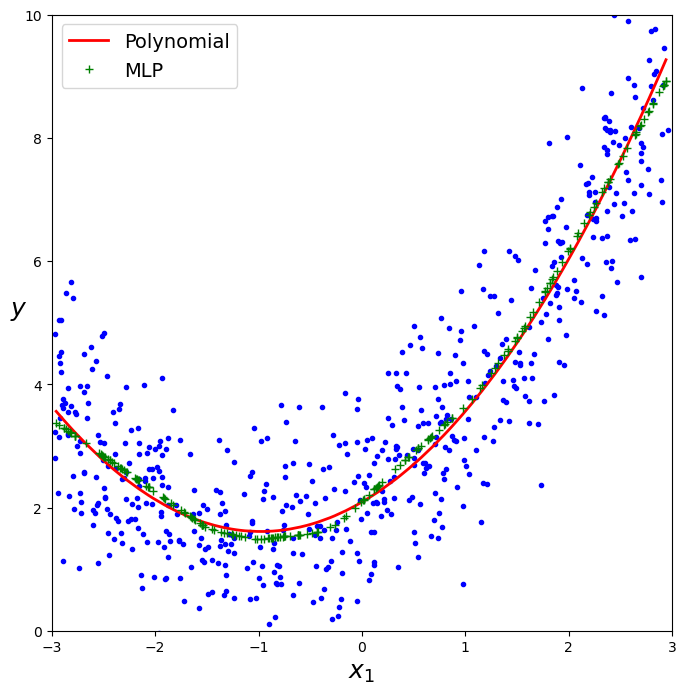

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.plot(X_train, Y_train, "b.")
ix = np.argsort(X_validation[:,0])
plt.plot(X_validation[ix], Y_poly_val[ix], "r-", linewidth=2, label="Polynomial")
plt.plot(X_validation[ix], mlp_pred[ix], "g+", linewidth=2, label="MLP")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()